# Perceptron and Keras

## Configuration

In [1]:
# load lib
import numpy as np
import os

# random seed
np.random.seed(42)

# for figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR = "./"
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("save fig :", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Perceptron

In [2]:
# load data and lib
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
iris = load_iris()
x = iris.data[:, (2,3)] # extract two features
y = (iris.target == 0).astype(np.int32) # extract label

# fit the perceptron
percept = Perceptron( max_iter=1000, tol=1e-3, random_state=42)
percept.fit(x, y)

# predic a sample
y_pred = percept.predict([[2, 0.5]])
print("y_pred is ", y_pred)

y_pred is  [1]


save fig : perceptron_iris_plot


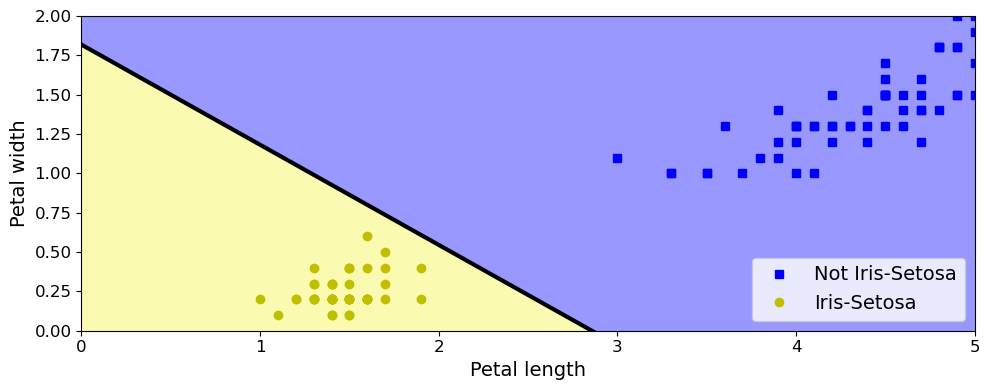

In [3]:
# plot the data and the perceptron line
a = -percept.coef_[0][0] / percept.coef_[0][1]
b = -percept.intercept_ / percept.coef_[0][1]
axes = [0,5,0,2]

x0, x1 = np.meshgrid(
    np.linspace( axes[0], axes[1], 500).reshape(-1,1),
    np.linspace( axes[2], axes[3], 500).reshape(-1,1),
)
x_new = np.c_[x0.ravel(), x1.ravel()]
y_pred = percept.predict(x_new)
zz = y_pred.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(x[y==0, 0], x[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(x[y==1, 0], x[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_iris_plot")
plt.show()

## Activation function

In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

save fig : activation_functions_plot


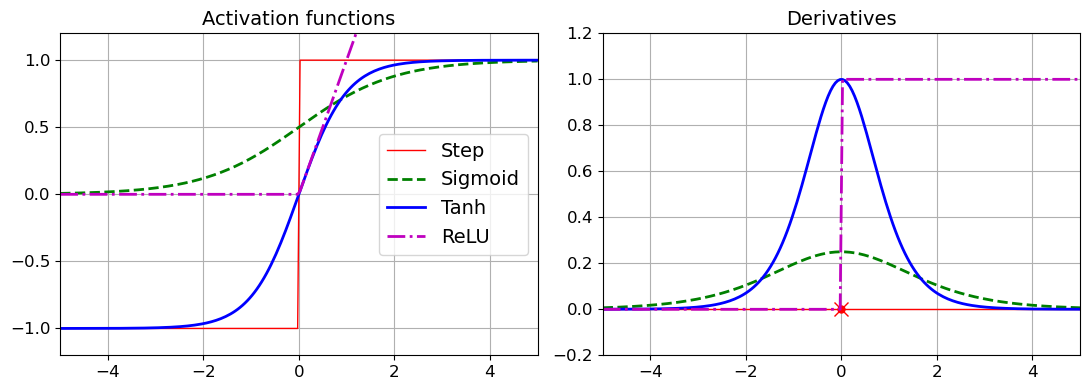

In [5]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

## Keras - Image classification

In [6]:
# load tf and keras
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)

2.18.0
3.7.0


In [7]:
# load data - MNIST
fashion = keras.datasets.fashion_mnist
(x_train_f, y_train_f), (x_test, y_test) = fashion.load_data()
print(x_train_f.shape)
print(y_train_f.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [8]:
# data processing
x_valid, x_train = x_train_f[:5000] / 255., x_train_f[5000:] / 255.
y_valid, y_train = y_train_f[:5000], y_train_f[5000:]
x_test = x_test / 255.0

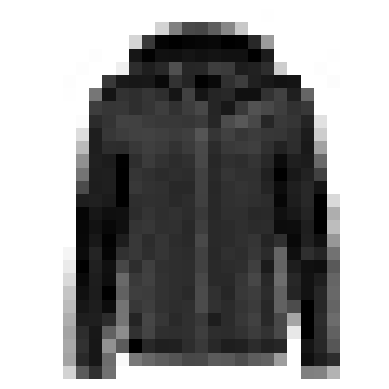

save fig : fashion_mnist_plot


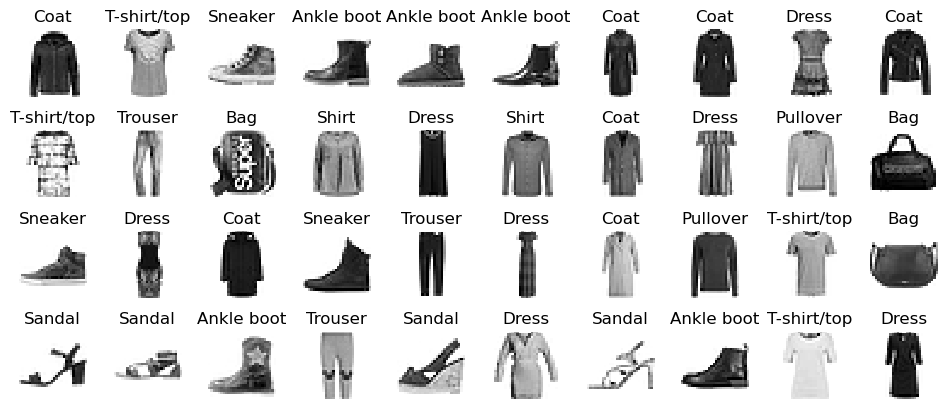

In [9]:
# plot a sample images
plt.imshow( x_train[0],  cmap="binary")
plt.axis("off")
plt.show()

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(x_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

In [10]:
# random seed
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [11]:
# build the model in keras
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

C:\Users\gopwi\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [13]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

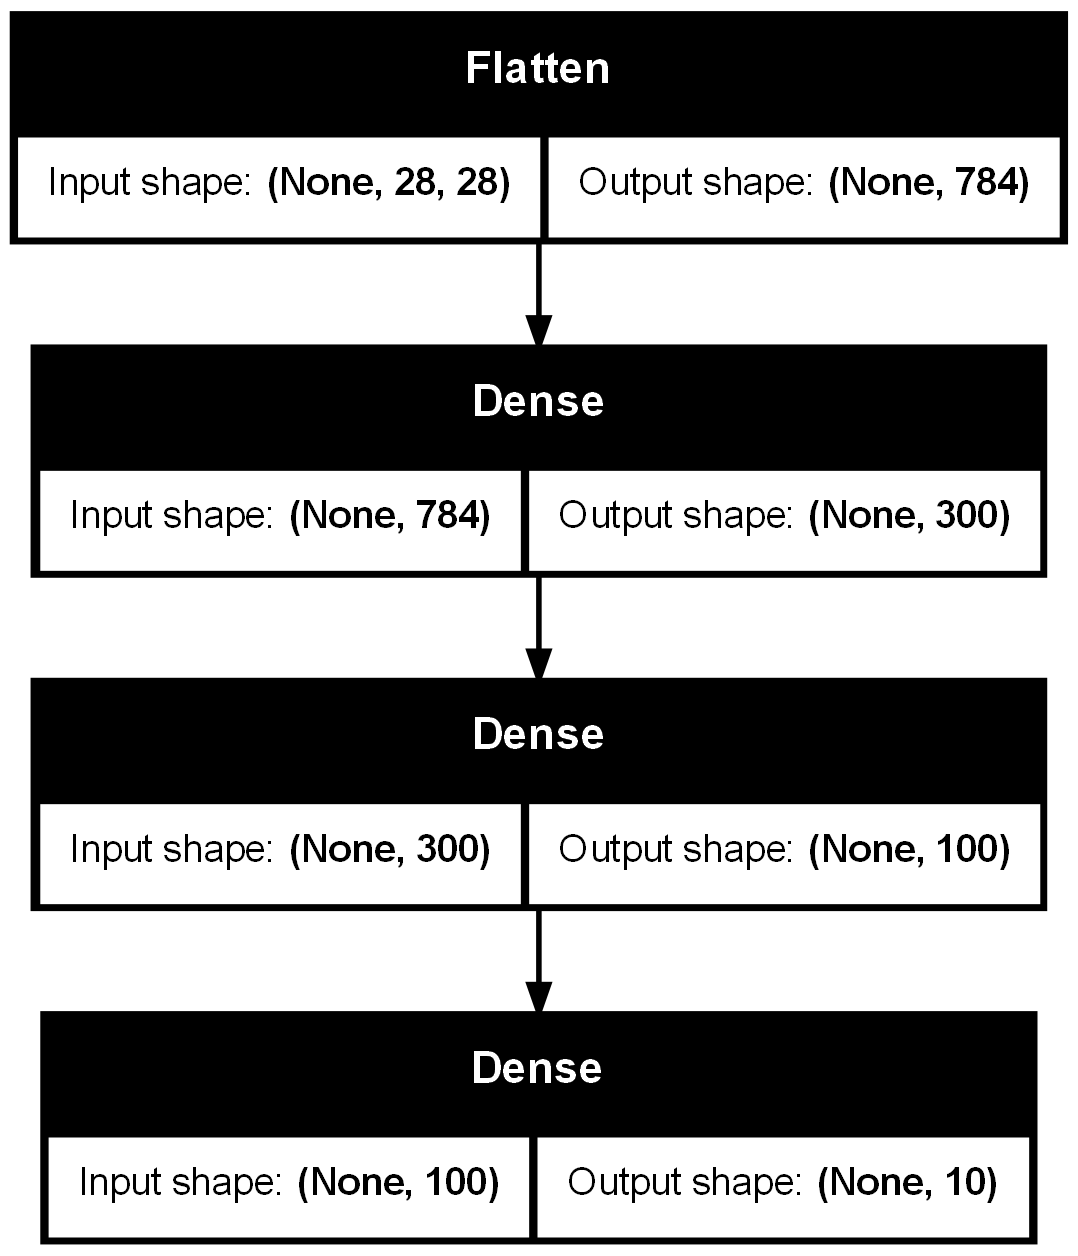

In [14]:
keras.utils.plot_model(model, "./images/my_fashion_mnist_model.png", show_shapes=True)

In [15]:
# inside of the model
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [16]:
model.get_layer(hidden1.name) is hidden1

True

In [17]:
w, b = hidden1.get_weights()
print(w, b)

[[ 0.05923966 -0.01552655  0.00544472 ... -0.01238723 -0.03876225
   0.0194425 ]
 [-0.02683636  0.00288453  0.05034741 ... -0.07235618 -0.03775337
  -0.02378536]
 [-0.05499198 -0.01045898  0.03788263 ...  0.00479367  0.00596786
  -0.01437935]
 ...
 [-0.06630814  0.02455094 -0.06816734 ... -0.02710915  0.02648617
  -0.06868308]
 [ 0.06628062  0.06576891 -0.06582785 ... -0.05589975 -0.03083853
   0.02514862]
 [ 0.03172841  0.0725227   0.06425518 ... -0.06213916 -0.05217578
  -0.06973366]] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [18]:
# compile the model
model.compile( loss="sparse_categorical_crossentropy",
               optimizer="sgd",
               metrics=["accuracy"] )
# equivalant
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])

# run learning
history = model.fit(x_train, y_train, epochs=30,
                    validation_data=(x_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.9982 - sparse_categorical_accuracy: 0.6818 - val_loss: 0.5272 - val_sparse_categorical_accuracy: 0.8176
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.5062 - sparse_categorical_accuracy: 0.8221 - val_loss: 0.4609 - val_sparse_categorical_accuracy: 0.8398
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.4527 - sparse_categorical_accuracy: 0.8404 - val_loss: 0.4245 - val_sparse_categorical_accuracy: 0.8542
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.4227 - sparse_categorical_accuracy: 0.8502 - val_loss: 0.4016 - val_sparse_categorical_accuracy: 0.8608
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.4010 - sparse_categorical_accuracy: 0.8575 - val_loss: 0.3851 - val_sparse_categorical_accuracy: 0.8648
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.3841 - sparse_categorical_accuracy: 0.8633 - val_loss: 0.3724 - val_sparse_categorical_accuracy:

In [19]:
print(history.params)
print(history.epoch)
print(history.history.keys())
print(history.history)

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])
{'loss': [0.7248736023902893, 0.492769718170166, 0.44725698232650757, 0.41940200328826904, 0.39877966046333313, 0.38241150975227356, 0.36871737241744995, 0.35685253143310547, 0.3463992178440094, 0.3371523320674896, 0.32856303453445435, 0.32066810131073, 0.3133643865585327, 0.306522399187088, 0.29992052912712097, 0.2937586009502411, 0.2878994643688202, 0.2822263538837433, 0.276898592710495, 0.27171266078948975, 0.2667611837387085, 0.2618812620639801, 0.25714051723480225, 0.2526431679725647, 0.24846740067005157, 0.24409350752830505, 0.23989106714725494, 0.2357962727546692, 0.23182493448257446, 0.22800688445568085], 'sparse_categorical_accuracy': [0.7594909071922302, 0.8275818228721619, 0.8426908850669861, 0.8518727421760559, 0.8587818

save fig : keras_learning_curves_plot


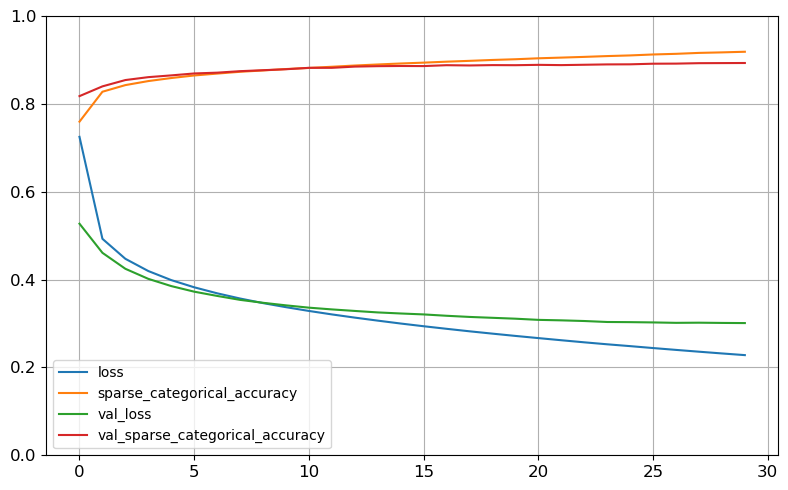

In [20]:
# plot acc and loss
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - loss: 0.3545 - sparse_categorical_accuracy: 0.8768
[0.34805232286453247, 0.878600001335144]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
[[0.   0.   0.   0.   0.   0.01 0.   0.04 0.   0.95]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[9 2 1]
save fig : fashion_mnist_images_plot


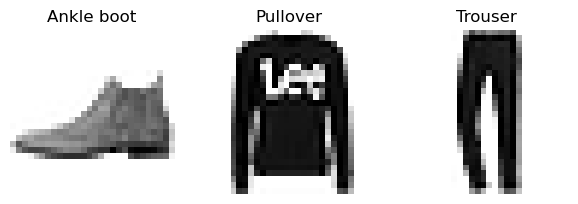

In [21]:
# evaluation and prediction for test samples
print(model.evaluate(x_test, y_test))
print(model.predict(x_test[:3]).round(2))
print(np.argmax( model.predict( x_test[:3]) , axis=-1 ) )

plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(x_test[:3]):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()